To do 

Tors/fre

1. Rød Tråd - fortæl en historie!
2. Sammenlign med andre år

Findings 

1. Dårligste og bedste arbejdspladsvilkår i 2018 (branche)
2. Største ændring +/- fra 2014-16-18
3. Køn/alder (clustering - implikationer ift sensitive attributer)
4. Kombination - hvad siger det sammen - og videre analyse, hvad ligger i overfladen, som kan blive bedre med mere data/undersøgelse

# Case / PFA / Arbejdstilsynets rapport

*af Albert Cort Banke*

---

## Introduktion

Velkommen til min Jupyter Notebook, hvor jeg vil præsentere resultaterne af min undersøgelse af Arbejdstilsynets rapport fra 2018. 

Notebooken er struktureret i to dele. Første del er en **data wrangling** (DW) del med initialisering og dataforberedelse. Anden del er **dataanalyse** (DA), hvor jeg præsenterer to resultater i **EDA (exploratory data analysis)**-delen og to resultater i **machine learning-delen**.

**Principper for notebooken og kodningen**

Med denne notebook stræber jeg efter at opnå tre ting:

1. At arbejde så **pythonic** som muligt for at sikre en høj grad af effektivitet og læsbarhed i koden.
2. At forklare alle trin med kommentarer for at skabe gennemsigtighed og samtidig gøre det muligt at genskabe resultaterne.
3. At visualisere data og modeller for at understøtte mine resultater.

**God læsning!**


_____________________

## 1. DW: Initialization & data inspektion

I denne blok sættes environmentet op, med initialisering af nødvendige libraries samt upload af data. Formålet er at skabe et udgangspunkt for data analyse med python og dets data wrangling libraries pandas og numpy, data analysis vha. seaborn og kvantitativ analyse hjulpet af machine learning librariet scikit-learn.

Notebooken er kodet i Python 3.10.6 med nedenstående libraries og dependencies.

In [1057]:
# Indlæs libraries

# Data wrangling
import pandas as pd
import numpy as np
import re

# Visualization 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning 
from sklearn.decomposition import TruncatedSVD

In [1058]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1059]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


### 1. Indlæs og inspicer dataet

Data består af to semikolonseparerede filer fra det Nationale Center For Arbejdsmiljøs undersøgelse om fysiske og psykiske forhold fra 50.000 adspurgte danskere i 2018.

Det ene ark vedrører brancher og jobtyper. Det andet ark vedrører alder og køn.

In [1060]:
# Filepaths, tilpas disse til lokal-sti

brancher_fp = r'/Users/albertcortbanke/Case/data/arbejdsmarkedsanalyse_brancher.csv'
koen_alder_fp = r'/Users/albertcortbanke/Case/data/arbejdsmarkedsanalyse_koen_alder.csv'

In [1061]:
# Indlæs data med pandas read_csv, brug delimiter = ; til at spalte data korrekt og samtidig enconding = 'latin-1' for at tilpasse encoding til dataet (det er lidt... funky)

branche_data = pd.read_csv(brancher_fp, delimiter = ";", encoding='latin-1')
koen_alder_data = pd.read_csv(koen_alder_fp, delimiter = ";", encoding='latin-1')

In [1062]:
# Check at begge data frames er blevet loaded korrekt (i.e ingen formatterings-issues eller lignende)

branche_data.head() # ser helt fint ud

,Field Values Index,Ordforklaring,Akse,Farveskala,Field Values Index (Fixed),Navigation - Arbejdsmiljøprofiler,Score (Indekseret score) (gennemsnit),Score (Indekseret score) (gennemsnit) (label),Score (Total) (Fixed),Gennemsnit,...,Main Group,Score,Field Values,Mean,Question Label,Sluttekst,Spm Formulering,Topic Label,Type,Year
0,"49,824544","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"-5,059771093","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,658698159","-2,658698159","2,658698159",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
1,"59,24585073","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"4,361535635","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,566242056","-2,566242056","2,566242056",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
2,"89,95423342","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"35,06991833","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,264884984","-2,264884984","2,264884984",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
3,"44,36525953","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"-10,51905556","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,712272911","-2,712272911","2,712272911",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
4,"85,4477087","Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"30,5633936","54,88431509",Arbejdsmiljøprofiler,"52,18088073","2,609044037","-2,609044037",NaN,...,Job,"2,309109817","-2,309109817","2,309109817",Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018


In [1063]:
koen_alder_data.head() # ser også fint ud, kolonnerne er sat rigtigt op og der er index

,Group,Question Label,Topic Label,Year,Akse,Ordforklaring,Antpers,Farveskala,Gennemsnit,Score (Indekseret score) (gennemsnit) (label),Score (Indekseret score) (gennemsnit),Score (Indekseret score),Score
0,"Mænd, 55 - 64 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",5080,"38,852616243",NaN,NaN,NaN,"18,223967423","0,911198371"
1,"Mænd, 45 - 54 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",5367,"29,425529088",NaN,NaN,NaN,"19,637802224","0,981890111"
2,"Mænd, 35 - 44 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",3496,"18,435371488",NaN,NaN,NaN,"21,286059742","1,064302987"
3,"Mænd, 25 - 34 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",1876,"2,222449347",NaN,NaN,NaN,"23,717605476","1,185880274"
4,"Mænd, 18 - 24 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",591,"9,439166690",NaN,NaN,NaN,"22,635272623","1,131763631"


**Kort beskrivelse af hvad dataets opgbyning**

* Første data frame, branche_alder_data, er en opsamling af surveys om arbejdsmiljø og helbred blandt danskere i arbejdsmarkedet anno 2018. Hver række indeholder et spørgsmål, et svar fra en gruppe (bl.a. Brandmænd, bus- og taxachauffører) og det indekserede gennemsnit (for alle grupper) samt den individuelle score for gruppen.

* Anden data frame, koen_alder_data, er en også opsamling af surveys af samme kilde som ovenfor. Forskellen er at grupperingerne er ud fra køn (M/K) og alder i bins (45 - 54 år, 18 - 24 år). 


**To vigtige takeaways fra en initiel inspektion af dataet**

1) Vi har at gøre med brede og korte datasæt. Altså datasæt med mange attributer men få instances; eksempelvis har branche_data 8115 rows × 41 columns. Dette giver intuitivt god mening når vi ved at dataet er sampled ud fra grupper, og kolonner som 'Antpers' tit er i tusinde. 

2) Det ser ud til at det er en del kolonner med manglende data og samtidig er meget af dataet indkodet med den danske (2,423) - hvilket vi gør bedst ved at ændre for computational standards. Lad os dog først tage et dybere kig i manglende data, da det er ekstremt vigtigt at forholde sig til

In [1064]:
# Her checker vi dataets integritet, ved bl.a. at kigge på antallet af manglende data i de forskellige kolonner med pandas info() method

branche_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8115 entries, 0 to 8114
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Field Values Index                             8096 non-null   object 
 1   Ordforklaring                                  7737 non-null   object 
 2   Akse                                           8096 non-null   object 
 3   Farveskala                                     8096 non-null   object 
 4   Field Values Index (Fixed)                     8115 non-null   object 
 5   Navigation - Arbejdsmiljøprofiler              8115 non-null   object 
 6   Score (Indekseret score) (gennemsnit)          8115 non-null   object 
 7   Score (Indekseret score) (gennemsnit) (label)  8115 non-null   object 
 8   Score (Total) (Fixed)                          8115 non-null   object 
 9   Gennemsnit                                     109 n

In [1065]:
koen_alder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Group                                          1308 non-null   object 
 1   Question Label                                 1308 non-null   object 
 2   Topic Label                                    1308 non-null   object 
 3   Year                                           1308 non-null   int64  
 4   Akse                                           1308 non-null   object 
 5   Ordforklaring                                  1248 non-null   object 
 6   Antpers                                        1308 non-null   int64  
 7   Farveskala                                     1308 non-null   object 
 8   Gennemsnit                                     0 non-null      float64
 9   Score (Indekseret score) (gennemsnit) (label)  0 non

Ovenstående viser at begge data frames har kolonner der er incomplete. Derudover ser man at det er en blanding af object og int64 data types, alså en blanding af tekst og numeriske værdier. Dette skal addreseres da incompleteness er vigtigt for videre statistiske analyser og machine learning modelling. 

Til sammenligning er branche_data både bredere (flere kolonner; 41 i alt) og længere (flere rækker; 8115 i alt) end koen_alder_data, der har 13 kolonner og 1308 rækker. 

Nedenfor visualisereres missingness for at vise, hvor meget data der mangler:

<AxesSubplot: >

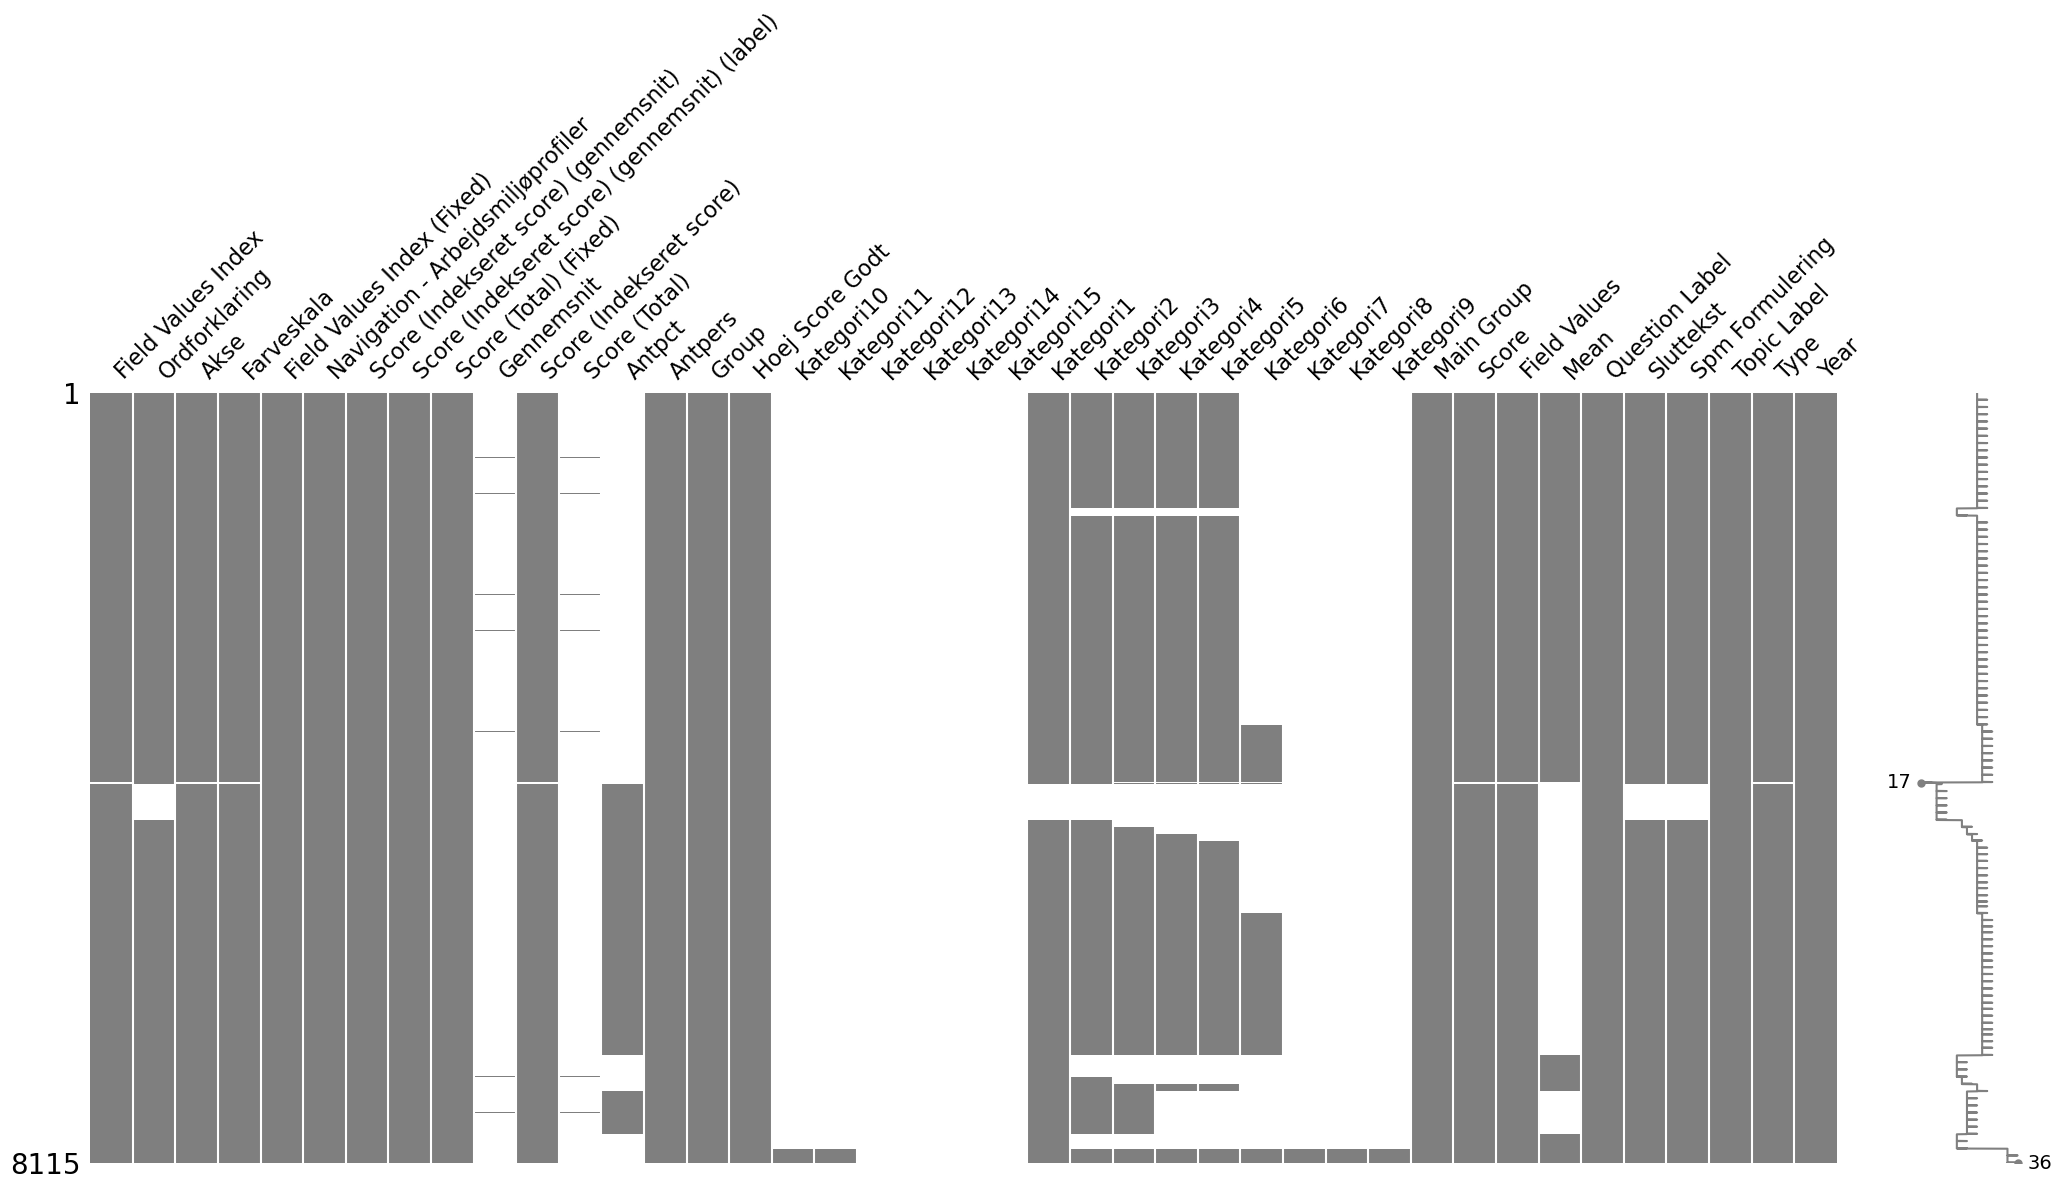

In [1066]:
# Visualisering af manglende data for branche_data
msno.matrix(branche_data, color=(0.50, 0.50, 0.50)) # bemærk at alle kolonners titler kan ses her 

<AxesSubplot: >

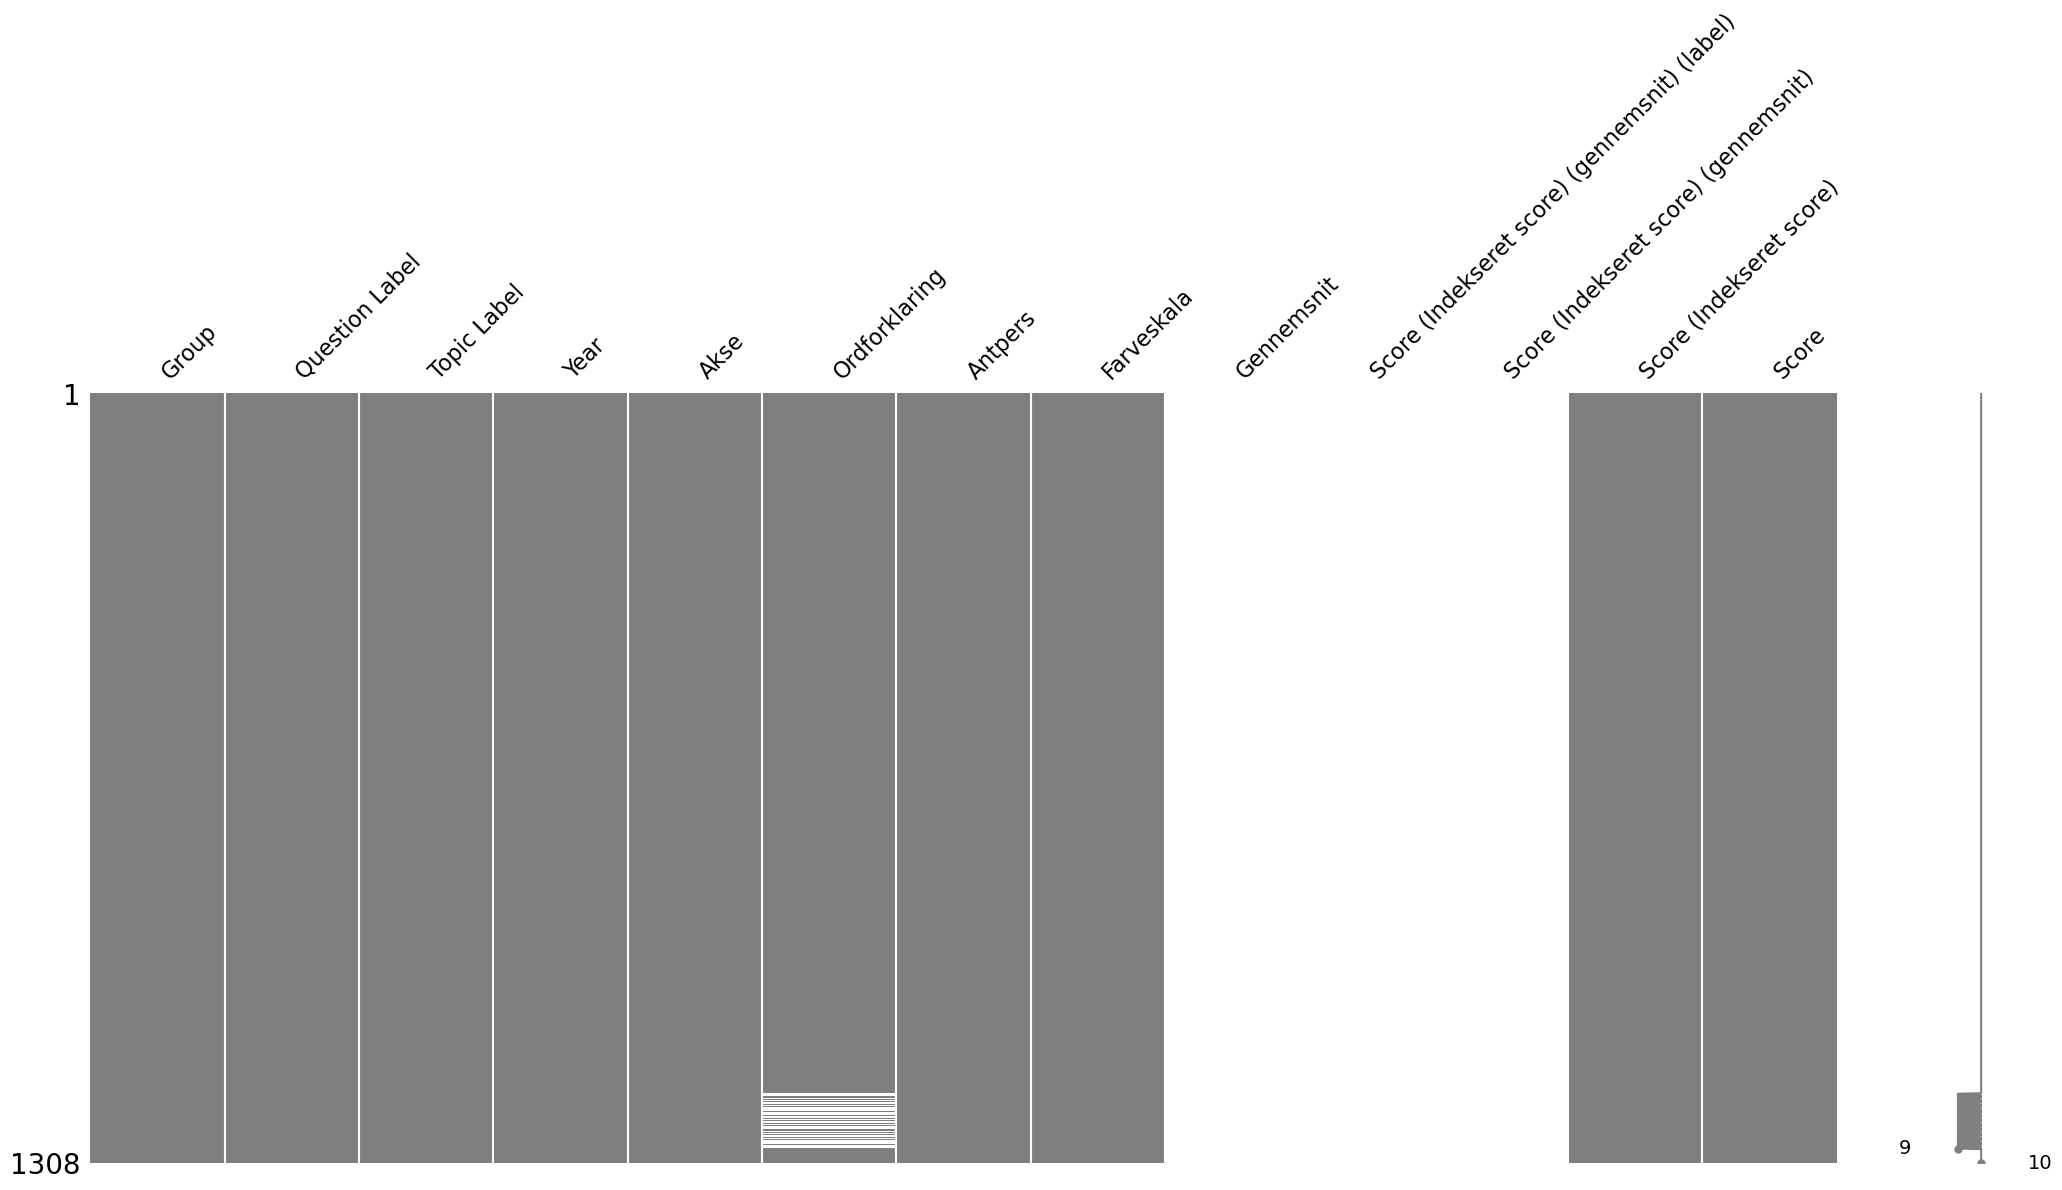

In [1067]:
# Visualisering af manglende data for koen_alder_data
msno.matrix(koen_alder_data, color=(0.50, 0.50, 0.50))

Ud fra graferne, kan man se at der skal graves dybere med data transformations i preprocessing steppet for at gøre dataet klar til EDA (eksplorativ data analyse) og modellering. Dette ses bl.a. i kolonnen 'gennemsnit' for branche_data og koen_alder_data, der ekstremt sparse i begge. 

# 2. DW: Data pre-processing

I denne blok pre-processes begge datasæt så de er klar til EDA. Transformationerne hjælper med at enable data og udvinde findings. Principperne for denne data-preprocessing er respekt for det originale stamdata. To vigtige transformationer finder sted:

1) Dimensionalitets reduktion. Vi kan ikke gøre os kloge på noget, når der er over 60 kolonner i spil. Vi skal finde de vigtigste og rigeste data kilder i begge data frames.  
2) Konvertere data typer til deres korrekte type. Det vil sige objects some 'Score (Total) (Fixed)' skal konverteres fra object til float64.
3) Transformere missing data

### 1) Dimensionalitets reduktion

Især den første data frame, brance_data, har en stor dimensionalitet. For at øge modellering og visualiseringers effekt gør vi os klogt i at vælge de vigtigste kolonner med bedst, og mest, information, for at finde gode findings. Nu da vi har visualiseret hvor dataet er sparse, altså hvor det mangler noget, kan vi bruge det som pejlemærke til denne del. 

Den bedste måde at gøre dette initielle skridt er at undersøge kolonnerne individuelt, og se om det er nogle kolonner der gengiver det samme eller unødvendig information. For numeriske kolonner kan man eksempelvis bruge correlations analyse til at se om der er høj correlation mellem kolonner. Dette gør vi dog ikke endnu, da dataet mangler at blive transformeret.

Efter at have undersøgt data framen branche_data, er det klart at visse kolonner godt kan fjernes. Eksempelvis gentages alle kategorierne i 'Ordforklaring' og derfor kan man beholde sidstnævnte. 

In [1068]:
# Liste af kolonner der droppes 
columns_to_drop = ['Spm Formulering', 'Field Values Index', 'Farveskala', 'Field Values Index (Fixed)', 'Navigation - Arbejdsmiljøprofiler', 'Gennemsnit', 
                   'Score (Total)', 'Main Group', 'Kategori1', 'Kategori2', 'Kategori3', 'Kategori4', 'Kategori5', 'Kategori6', 'Kategori7', 'Kategori8', 'Kategori9',
                   'Kategori10', 'Kategori11', 'Kategori12', 'Kategori13', 'Kategori14', 'Kategori15', 'Score (Total) (Fixed)', 'Field Values', 'Mean', 'Sluttekst', 
                   'Score (Indekseret score) (gennemsnit)', 'Score (Indekseret score)']

# Score == Mean == -(Field Values). Derfor nøjes vi med at beholde score & Score (Indekseret score) (gennemsnit) (label)
# Bemærk også at det ville være en lille smule mere clean at lave columns to keep, men at det er vigtigt at vise, hvad der fjernes fra data framen

# Drop de specificerede kolonner
branche_data = branche_data.drop(columns=columns_to_drop)

# Vi recaller framen for at se den igen. Den ser langt bedre ud og mere klar til EDA og [...]
branche_data.head()

,Ordforklaring,Akse,Score (Indekseret score) (gennemsnit) (label),Antpct,Antpers,Group,Hoej Score Godt,Score,Question Label,Topic Label,Type,Year
0,"Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"2,609044037",NaN,224,Bibliotekarer og beskæftigede med kultur,0,"2,658698159",Ikke nok tid til arbejdsopgaver,Kvantitative krav og grænseløshed,kont,2018
1,"Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"2,609044037",NaN,388,Bogholdere,0,"2,566242056",Ikke nok tid til arbejdsopgaver,Kvantitative krav og grænseløshed,kont,2018
2,"Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"2,609044037",NaN,189,"Brandmænd, reddere og sikkerhedsvagter",0,"2,264884984",Ikke nok tid til arbejdsopgaver,Kvantitative krav og grænseløshed,kont,2018
3,"Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"2,609044037",NaN,182,Bude og kurerer,0,"2,712272911",Ikke nok tid til arbejdsopgaver,Kvantitative krav og grænseløshed,kont,2018
4,"Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,"2,609044037",NaN,280,"Bus- og taxachauffører, lokoførere m.fl.",0,"2,309109817",Ikke nok tid til arbejdsopgaver,Kvantitative krav og grænseløshed,kont,2018


In [1069]:
# For den anden data frame, koen_alder_data, er det kun fordelagtigt at droppe Farveskala samt Gennemsnit, Score (Indekseret score)(gennemsnit label) 
# og Score (Indekseret score)(gennemsnit) da disse kolonner er tomme

columns_to_drop = ['Score (Indekseret score) (gennemsnit)', 'Score (Indekseret score) (gennemsnit) (label)', 'Farveskala', 'Gennemsnit']

# Drop de specificerede kolonner
koen_alder_data = koen_alder_data.drop(columns=columns_to_drop)

koen_alder_data.head() # Igen en god clean data frame, bemærk også her at kolonnerne score og score (indekseret score) skal have en transformation. 

,Group,Question Label,Topic Label,Year,Akse,Ordforklaring,Antpers,Score (Indekseret score),Score
0,"Mænd, 55 - 64 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",5080,"18,223967423","0,911198371"
1,"Mænd, 45 - 54 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",5367,"19,637802224","0,981890111"
2,"Mænd, 35 - 44 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",3496,"21,286059742","1,064302987"
3,"Mænd, 25 - 34 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",1876,"23,717605476","1,185880274"
4,"Mænd, 18 - 24 år",Symptomer på angst,Angstsymptomer,2018,Score,"Spørgsmål: I de sidste fire uger, hvor meget h...",591,"22,635272623","1,131763631"


### 2) Konvertere data typer til deres korrekte type

Fordi at Pandas read_csv havde svært ved at formatere vores data til deres korrekte datatyper (eksempelvis er Score af typen 'object' e.g. en string) skal vi have vores Regex frem og bygge en skarp funktion der kan behandle begge data frames. Den er bygget herunder og transformerer hurtigt, og korrekt, begge data frames kolonner til deres korrekte type som demonstreret. 

In [1070]:
# Her ser vi antallet af value counts for branche_data og koen_alder_data før

print("value counts for branche_data før transformationen:")
display(branche_data.dtypes.value_counts())
print("\nvalue counts for koen_alder_data før transformationen:")
display(koen_alder_data.dtypes.value_counts())

value counts for branche_data før transformationen:


object    9
int64     3
dtype: int64


value counts for koen_alder_data før transformationen:


object    7
int64     2
dtype: int64

In [1071]:
# Funktionen konverterer kolonner med tal og komma separatorer til numeriske værdier.
def convert_columns_to_numeric(df):
    # Itererer igennem alle kolonner i dataframen
    for column in df.columns:
        # Tjekker om kolonnens datatype er 'object' og om kolonnen kun indeholder talværdier og komma separatorer vha. regex
        # Vi vil nemlig ikke have at 'Ordforklaring' konverteres ved en fejl
        if df[column].dtype == 'object' and re.match(r'^[0-9,]+$', df[column].str.strip().str.cat()):
            try:
                # Erstatter komma separatorer med punktum separatorer.
                df[column] = df[column].str.replace(',', '.')
                # Konverterer kolonnen til numerisk datatype.
                df[column] = pd.to_numeric(df[column], errors='coerce')
            except ValueError:
                pass
    # Returnerer den konverterede dataframe.
    return df

In [1072]:
# Konverter dele af branche_datas kolonner til numerisk
branche_data = convert_columns_to_numeric(branche_data)

# Konverter dele af koen_alder_datas kolonner til numerisk
koen_alder_data = convert_columns_to_numeric(koen_alder_data)

In [1073]:
# Her ser vi antallet af value counts for branche_data og koen_alder_data efter transformationen

print("value counts for branche_data efter transformationen:")
display(branche_data.dtypes.value_counts())
print("\nvalue counts for koen_alder_data efter transformationen:")
display(koen_alder_data.dtypes.value_counts())

# Succes!

value counts for branche_data efter transformationen:


object     6
float64    3
int64      3
dtype: int64


value counts for koen_alder_data efter transformationen:


object     5
int64      2
float64    2
dtype: int64

### 3) Transformering af manglende og synligt data

* Ved at inspicere de to data frames ovenfor ved vi at vi skal forholde os til manglende data. **Vi fjerner rækker fra kolonner som har lav incompleteness (under 5% af samlet data)**

* Kolonnen 'Ordforklaring' indeholder meget ekstra tekst som ikke er nødvendigt (/n og Spørgsmål: for hver række). Dette fjerner vi også. 

* Vi reformatterer grupperne i koen_alder_data ved at spalte køn og alder ud i to individuelle kolonner. Dette er vigtigt for den videre modellering

* Mange af spørgsmålene ikke homogenitet i deres svargrundlag. Eksempelvis er nogle scoret fra 1-5. 1-6, 1-10, Ja/Nej, 0-100. Dette fikses ved key-word filtrering

* Kolonnen 'Hoej Score Godt' mangler i data framen koen_alder. Denne skabes med de korrekte værdier ud fra et Left-Join (Merge) med branche_data framen's indhold

In [1074]:
koen_alder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1308 non-null   object 
 1   Question Label            1308 non-null   object 
 2   Topic Label               1308 non-null   object 
 3   Year                      1308 non-null   int64  
 4   Akse                      1308 non-null   object 
 5   Ordforklaring             1248 non-null   object 
 6   Antpers                   1308 non-null   int64  
 7   Score (Indekseret score)  1308 non-null   float64
 8   Score                     1308 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 92.1+ KB


In [1075]:
# Inspicere en udvalgt kolonne i branche_data og koen_alder_data der repræsenterer flere kolonner med incompleteness

# Laver en funktion der tager længden af det komplette data og sammenligner med en kolonne med missingness
def print_null_info(dataframe, column):
    total_rækker = len(dataframe)
    non_null_rækker = dataframe[column].count()
    missing_rækker = total_rækker - non_null_rækker
    print("Længde af data framen: {}. Antal af non-null values i '{}' kolonnen: {}. Antal af missing values i '{}' kolonnen: {} ({:.2f}%)".
          format(total_rækker, column, non_null_rækker, column, missing_rækker, (missing_rækker/total_rækker)*100))

# Brug funktionen på branche_data 
print_null_info(branche_data, 'Type')

# Brug funktionen på koen_alder_data
print_null_info(koen_alder_data, 'Ordforklaring')

Længde af data framen: 8115. Antal af non-null values i 'Type' kolonnen: 8096. Antal af missing values i 'Type' kolonnen: 19 (0.23%)
Længde af data framen: 1308. Antal af non-null values i 'Ordforklaring' kolonnen: 1248. Antal af missing values i 'Ordforklaring' kolonnen: 60 (4.59%)


In [1076]:
# Begge er altså under vores threshold (<5% af den totale mængde data). Vi kan derfor fjerne rækkerne fra dataet

branche_data = branche_data.dropna(subset=['Type'])

koen_alder_data = koen_alder_data.dropna(subset=['Ordforklaring'])

In [1077]:
# Her fjernes unødvendig tekst fra Ordfoklarings-kolonnen. Bemærl her at der bruges anonyme funktioner (lambda) for demonstrative purposes. Der kunne også bygges en funktion ligesom ovenfor

# Definer et regex mønster, der matcher 'Spørgsmål:' og efterfølgende kun bevarer single mellemrum og ikke-special-karakterer
regex_pattern = r'Spørgsmål:\s+|\s{2,}|\W+'

# Anvend regex mønsteret på 'Ordforklaring' kolonnen i begge dataframes
branche_data['Ordforklaring'] = branche_data['Ordforklaring'].apply(lambda x: re.sub(regex_pattern, ' ', str(x)).strip())
koen_alder_data['Ordforklaring'] = koen_alder_data['Ordforklaring'].apply(lambda x: re.sub(regex_pattern, ' ', str(x)).strip())

# Tjek en af rækkerne
branche_data.Ordforklaring[1] # ser godt ud

'Hvor ofte oplever du at du har nok tid til dine arbejdsopgaver 1 Altid 2 Ofte 3 Sommetider 4 Sjældent 5 Aldrig I resultaterne præsenteres den gennemsnitlige score 1 5'

In [1078]:
# Re-encoder Group kolonnen til to nye kolonner, en der indeholder køn, og så en der indeholder aldersgruppe.

# Bruger igen regex mønster til at fange informationen vi ønsker 
koen_alder_data[['køn', 'alder']] = koen_alder_data['Group'].str.extract(r'(\w+),?\s*(\d+\s*-\s*\d+\s*år)?')

# Fillna på alder, der hvor det er totaler
koen_alder_data['alder'] = koen_alder_data['alder'].fillna('18-100 år')

koen_alder_data.tail() # det ser helt fint ud

,Group,Question Label,Topic Label,Year,Akse,Ordforklaring,Antpers,Score (Indekseret score),Score,køn,alder
1303,"Kvinder, 25 - 34 år",Fysisk vold,Vold og trusler,2018,Andel (%),Har du indenfor de sidste 12 måneder været uds...,2398,9.368184,9.368184,Kvinder,25 - 34 år
1304,"Kvinder, 18 - 24 år",Trusler,Vold og trusler,2018,Andel (%),Har du indenfor de sidste 12 måneder været uds...,691,7.562770,7.562770,Kvinder,18 - 24 år
1305,"Kvinder, 18 - 24 år",Fysisk vold,Vold og trusler,2018,Andel (%),Har du indenfor de sidste 12 måneder været uds...,690,7.334526,7.334526,Kvinder,18 - 24 år
1306,Kvinder,Trusler,Vold og trusler,2018,Andel (%),Har du indenfor de sidste 12 måneder været uds...,19694,10.985068,10.985068,Kvinder,18-100 år
1307,Kvinder,Fysisk vold,Vold og trusler,2018,Andel (%),Har du indenfor de sidste 12 måneder været uds...,19701,8.482935,8.482935,Kvinder,18-100 år


Efter at have inspiceret spørgsmålene pba. ovenstående transformering, står det klart at sammenligningsgrundlaget er dårligt mellem diverse typer af spørgsmål. Eksempelvis rates nogle 1-5, 1-10, Ja/Nej, 0-100. Vi går os altså klogt i at udvælge et subset af dataet. Efter manuelt at have gennemgået spørgsmålene for branche_data og koen_alder_data er der størst repræsentation i spørgsmålene der rates fra 1-5 og returneres med et gennemsnit. 

Derfor kan vi lave en ret smart, samt elegant, filtrering af begge datasæt ved at søge efter **'I resultaterne præsenteres den gennemsnitlige score 1 5'** i vores formatterede 'Ordforklarings'-kolonne

In [1079]:
# Filtrer dataet
branche_data_filtered = branche_data[branche_data['Ordforklaring'].str.contains('I resultaterne præsenteres den gennemsnitlige score 1 5')]
koen_alder_data_filtered = koen_alder_data[koen_alder_data['Ordforklaring'].str.contains('I resultaterne præsenteres den gennemsnitlige score 1 5')]

# Check at dataet indeholder færre rækker men samme antal kolonner
print(branche_data_filtered.shape) # Ser godt ud
print(koen_alder_data_filtered.shape) # Samme her

(3420, 12)
(540, 11)


In [1080]:
# Skaber kolonenn 'Hoej Score Godt' i data framen koen_alder_data_filtreret ud fra tilsvarende værdier for 'Ordforklaring' i branche_data_filtered

# Merge data frames
merged_df = koen_alder_data_filtered.merge(branche_data_filtered, on='Ordforklaring', how='left')

# Drop duplikater og reset index
merged_df.drop_duplicates(subset='Ordforklaring', inplace=True)
merged_df.set_index('Ordforklaring', inplace=True)

# Skab kolonnen i den originale data frame ud fra merged_df's værdier (inhereted fra )
koen_alder_data_filtered['Hoej Score Godt'] = koen_alder_data_filtered['Ordforklaring'].map(merged_df['Hoej Score Godt'])


/var/folders/yg/_flttvqs6wb9krsgqy_16frw0000gn/T/ipykernel_29918/3965772579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  koen_alder_data_filtered['Hoej Score Godt'] = koen_alder_data_filtered['Ordforklaring'].map(merged_df['Hoej Score Godt'])


Kort afsluttende kommentar til DW. Vi har virkelig gjort nogle store fremskridt, ved bl.a. at transformere data typer og tekst, spaltet kolonner og filtreret ud fra homogenitet. Ovenfor kan man se at vores data er blevet lidt kortere (færre rækker) end førhen. Til dette skal en Data Scientist kommentar knyttes, nemlig; **kvalitet, over kvantitet - *især* når det kommer til data**

__________

## 3. DA: Eksplorativ Data Analyse (EDA)

I denne blok analyseres det processerede data eksplorativt med statistik og visualiseringer. Dette afgiver to interresante findings, som præsenteres og analyseres sammen. 

De to findings er

1) 
2)

In [1085]:
# Vi starter med at udforske dataets statistikker, efter vores transformationer i DW.

# Summary statistics, hvor 'Hoej Score Godt' == 1, for branche_data_filtered

branche_data_filtered[branche_data_filtered['Hoej Score Godt'] == 1].describe()

,Score (Indekseret score) (gennemsnit) (label),Antpct,Antpers,Hoej Score Godt,Score,Year
count,2204.000000,0.0,2204.000000,2204.0,2204.000000,2204.0
mean,3.722826,NaN,968.494555,1.0,3.688327,2018.0
std,0.320690,NaN,4172.115373,0.0,0.369750,0.0
min,3.155008,NaN,35.000000,1.0,2.539004,2018.0
25%,3.546519,NaN,193.000000,1.0,3.414974,2018.0
50%,3.762483,NaN,277.000000,1.0,3.706780,2018.0
75%,3.884033,NaN,608.000000,1.0,3.941122,2018.0
max,4.303816,NaN,37190.000000,1.0,4.727714,2018.0


In [1086]:
# Summary statistics, hvor 'Hoej Score Godt' == 0, for branche_data_filtered

branche_data_filtered[branche_data_filtered['Hoej Score Godt'] == 0].describe()

,Score (Indekseret score) (gennemsnit) (label),Antpct,Antpers,Hoej Score Godt,Score,Year
count,1216.000000,0.0,1216.000000,1216.0,1216.000000,1216.0
mean,2.824478,NaN,967.391447,0.0,2.819438,2018.0
std,0.454704,NaN,4168.768733,0.0,0.505727,0.0
min,1.793953,NaN,35.000000,0.0,1.217248,2018.0
25%,2.600991,NaN,191.750000,0.0,2.539528,2018.0
50%,2.886710,NaN,275.000000,0.0,2.830700,2018.0
75%,3.079284,NaN,606.000000,0.0,3.103138,2018.0
max,3.848065,NaN,37577.000000,0.0,4.416672,2018.0


* Den statistiske analyse af branche_data_filtered viser den gennemsnitlige indekserede score for spørgsmål hvor høj score er godt er 3.72. For data hvor høj score er dårligt er dette tal 2.83. Dette fremviser at respondenterne i undersøgelsen generelt har svaret højere ved spørgsmål hvor 5 er godt end hvor 5 er dårligt. 

* Gennemsnittet af antal personer der har svaret på hvert spørgsmål er 968 hvor høj score er godt, imens at det er 967 hvor høj score er dårligt. Dette tal skal dog holdes op i lyset af at der er total rækker der kan skabe statistisk inflation i dette. **Fokus skal derfor rættes på medianen (50%) hvor tallet falder til henholdsvis 277 og 275 respektivt.**

* Der er en lille diskrepans på gennemsnittet for 'Score' og Score Indekseret Gennemsnit. Dette er dog ned til 1. decimal og ændrer derfor ikke i det store billede for dataet og vores fremtidige analyse

In [1094]:
# Vi analyserer også det andet datasæt koen_alder_data_filtered

koen_alder_data_filtered[koen_alder_data_filtered['Hoej Score Godt'] == 1].describe()

,Year,Antpers,Score (Indekseret score),Score,Hoej Score Godt
count,348.0,348.000000,348.000000,348.000000,348.0
mean,2018.0,6133.798851,74.486151,3.724308,1.0
std,0.0,5822.437094,6.594351,0.329718,0.0
min,2018.0,610.000000,60.879596,3.043980,1.0
25%,2018.0,2270.750000,69.485500,3.474275,1.0
50%,2018.0,4716.500000,74.987705,3.749385,1.0
75%,2018.0,5916.250000,78.530131,3.926507,1.0
max,2018.0,19969.000000,88.695413,4.434771,1.0


In [1095]:
koen_alder_data_filtered[koen_alder_data_filtered['Hoej Score Godt'] == 0].describe()

,Year,Antpers,Score (Indekseret score),Score,Hoej Score Godt
count,192.0,192.00000,192.000000,192.000000,192.0
mean,2018.0,6126.81250,56.315480,2.815774,0.0
std,0.0,5825.63768,9.730638,0.486532,0.0
min,2018.0,616.00000,32.102065,1.605103,0.0
25%,2018.0,2285.75000,51.693791,2.584690,0.0
50%,2018.0,4811.50000,57.070546,2.853527,0.0
75%,2018.0,5939.75000,61.995728,3.099786,0.0
max,2018.0,20189.00000,80.038526,4.001926,0.0


* Den statistiske analyse af koen_alder_data_filtered viser den gennemsnitlige indekserede score for spørgsmål hvor høj score er godt er 3.72. For data hvor høj score er dårligt er dette tal 2.815. Dette peger på stort overlap blandt spørgsmålene, men samtidig også den samplede population

* En stor forskel ift. branche-dataet er gennemsnittet af antal personer der har svaret på hvert spørgsmål. **Sættes fokus på medianen (50%) som beskrevet i analysen for branche-dataet, er tallene 4716 og 4811 respektivt.** altså markant højere end før. Dette giver god mening, da sampling her ikke er på branche men derimod på køn og grupperet alder

* Der er flere spørgsmål hvor 'Hoej Score Godt' er == 1. Tallene er 348 for godt og 192 for ikke godt. 

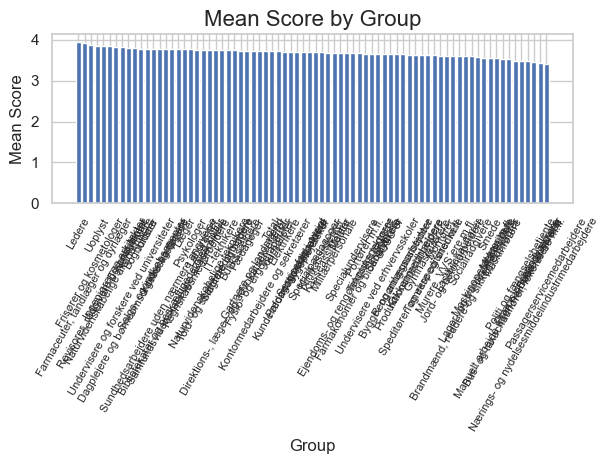

In [1103]:


# Filter the data frame to only include rows where 'Hoej Score Godt' is equal to 1
branche_data_filtered_hoej_t = branche_data_filtered[branche_data_filtered['Hoej Score Godt'] == 1]

# Group the data by the 'Group' column
grouped_data = branche_data_filtered_hoej_t.groupby(['Group'])['Score'].mean()

# Reset the index so that the grouped data is in a dataframe
grouped_data = grouped_data.reset_index()

# Sort the data by the mean 'Score' in descending order
grouped_data = grouped_data.sort_values(by='Score', ascending=False)


# Visualize the results using Matplotlib
plt.bar(grouped_data['x_ticks'], grouped_data['Score'])
plt.xticks(grouped_data['x_ticks'], grouped_data['Group'], rotation=60, fontsize=8) # Use the x_ticks column and the 'Group' column as the x-ticks and the labels, respectively
plt.xlabel("Group", fontsize=12) # Add a label for the x-axis
plt.ylabel("Mean Score", fontsize=12) # Add a label for the y-axis
plt.title("Mean Score by Group", fontsize=16) # Add a title for the plot
plt.tight_layout() # Make the plot more professional by adjusting the layout
plt.show()
